In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [29]:
X = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [30]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [31]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [32]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [33]:
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range (training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch+1),
          'Avg.cost =', '{:.4f}'.format(total_cost / total_batch))
print('최적화 완료!')

Epoch: 0001 Avg.cost = 0.1931
Epoch: 0002 Avg.cost = 0.0547
Epoch: 0003 Avg.cost = 0.0453
Epoch: 0004 Avg.cost = 0.0411
Epoch: 0005 Avg.cost = 0.0351
Epoch: 0006 Avg.cost = 0.0334
Epoch: 0007 Avg.cost = 0.0318
Epoch: 0008 Avg.cost = 0.0309
Epoch: 0009 Avg.cost = 0.0304
Epoch: 0010 Avg.cost = 0.0298
Epoch: 0011 Avg.cost = 0.0286
Epoch: 0012 Avg.cost = 0.0269
Epoch: 0013 Avg.cost = 0.0265
Epoch: 0014 Avg.cost = 0.0262
Epoch: 0015 Avg.cost = 0.0260
Epoch: 0016 Avg.cost = 0.0258
Epoch: 0017 Avg.cost = 0.0254
Epoch: 0018 Avg.cost = 0.0252
Epoch: 0019 Avg.cost = 0.0251
Epoch: 0020 Avg.cost = 0.0250
최적화 완료!


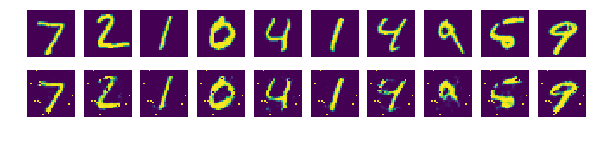

In [36]:
# 결과확인

sample_size = 10

samples = sess.run(decoder, feed_dict = {X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize = (sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))

plt.show()